In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_fea = pd.read_csv('../data/dup/train_fea21.csv')
print train_fea.shape

(646926, 199)


In [3]:
len(train_fea[train_fea['label']==0])*1.0/len(train_fea[train_fea['label']==1])

7.138355285504019

In [4]:
train = pd.read_csv('../data/dup/train.csv')
print train.shape
len(train[train['label']==0])*1.0/len(train[train['label']==1])

(3692105, 8)


38.58894929284481

In [5]:
d = train[train['clickTime']<300000]
print d.shape
len(d[d['label']==0])*1.0/len(d[d['label']==1])

(3362805, 8)


37.67382378986349

In [11]:
train['time'] = train['clickTime'].apply(lambda x:x/10000)

In [15]:
t = train[['time','label']]
t['count'] = 1
dt = t.groupby(['time','label'],as_index=False).sum()
dt

/home/hadoop/env2.7/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,time,label,count
0,17,0,283217
1,17,1,7464
2,18,0,153965
3,18,1,4101
4,19,0,99062
5,19,1,3286
6,20,0,199544
7,20,1,5056
8,21,0,299153
9,21,1,7120


In [16]:
dd = dt.pivot(index='time',columns='label',values='count')
dd

label,0,1
time,,
17,283217,7464
18,153965,4101
19,99062,3286
20,199544,5056
21,299153,7120
22,315464,7371
23,276030,7607
24,272992,7382
25,254218,7376


In [20]:
dtt = dd.reset_index()
dtt['ratio'] = dtt[0]*1.0/dtt[1]
dtt

label,time,0,1,ratio
0,17,283217,7464,37.944400
1,18,153965,4101,37.543282
2,19,99062,3286,30.146683
3,20,199544,5056,39.466772
4,21,299153,7120,42.015871
5,22,315464,7371,42.797992
6,23,276030,7607,36.286315
7,24,272992,7382,36.980764
8,25,254218,7376,34.465564
9,26,284364,7736,36.758532


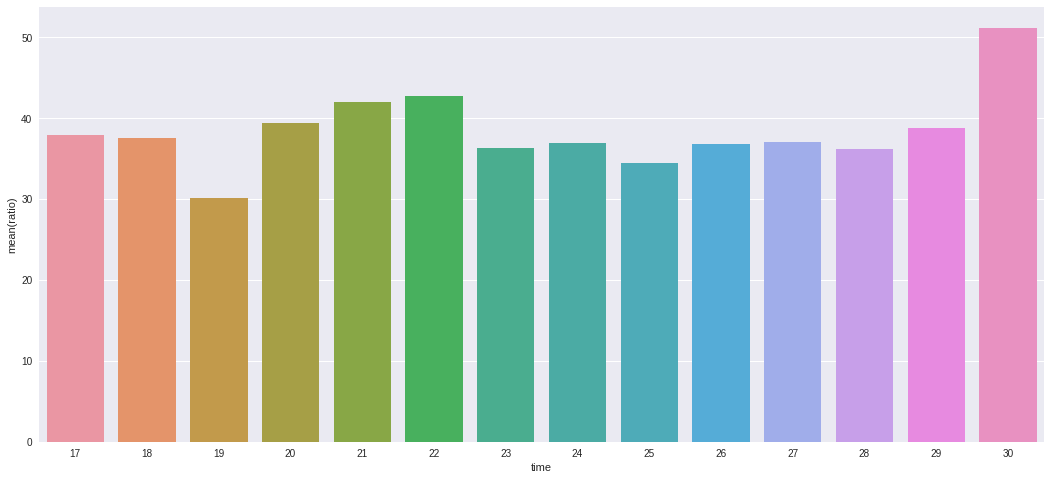

In [22]:
plt.figure(figsize=(18,8))
sns.barplot(x='time',y='ratio',data=dtt)
plt.show()